<a href="https://colab.research.google.com/github/sheamusfitz/DSPS_jFitzgerald/blob/master/HW8/HW8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

In [0]:
nameslist = pd.read_csv("https://raw.githubusercontent.com/sheamusfitz/DSPS_jFitzgerald/master/HW8/allstats.csv")

In [4]:
nameslist.head()

,id,identifier,species_id,height,weight,base_experience,order,is_default
0,1,bulbasaur,1,7,69,64,1,1
1,2,ivysaur,2,10,130,142,2,1
2,3,venusaur,3,20,1000,236,3,1
3,4,charmander,4,6,85,62,5,1
4,5,charmeleon,5,11,190,142,6,1


In [0]:
statslist = pd.read_csv("https://raw.githubusercontent.com/veekun/pokedex/master/pokedex/data/csv/pokemon_stats.csv")

In [6]:
statslist.head(12)

,pokemon_id,stat_id,base_stat,effort
0,1,1,45,0
1,1,2,49,0
2,1,3,49,0
3,1,4,65,1
4,1,5,65,0
5,1,6,45,0
6,2,1,60,0
7,2,2,62,0
8,2,3,63,0
9,2,4,80,1


In [0]:
statsdf = pd.DataFrame()

In [8]:
statsdf['pokemon_id']  = nameslist['id']
statsdf['pokemon_name'] = nameslist['identifier']
statsdf

,pokemon_id,pokemon_name
0,1,bulbasaur
1,2,ivysaur
2,3,venusaur
3,4,charmander
4,5,charmeleon
...,...,...
952,10153,araquanid-totem
953,10154,togedemaru-totem
954,10155,necrozma-dusk
955,10156,necrozma-dawn


In [9]:
for i in range(1,7):
     temp = statslist.where(statslist['stat_id'] == i).dropna()
     print(temp.head())
     statsdf = pd.merge(statsdf, temp[['base_stat', 'pokemon_id']], on='pokemon_id',suffixes = (str(i),str(i+10)))

    pokemon_id  stat_id  base_stat  effort
0          1.0      1.0       45.0     0.0
6          2.0      1.0       60.0     0.0
12         3.0      1.0       80.0     0.0
18         4.0      1.0       39.0     0.0
24         5.0      1.0       58.0     0.0
    pokemon_id  stat_id  base_stat  effort
1          1.0      2.0       49.0     0.0
7          2.0      2.0       62.0     0.0
13         3.0      2.0       82.0     0.0
19         4.0      2.0       52.0     0.0
25         5.0      2.0       64.0     0.0
    pokemon_id  stat_id  base_stat  effort
2          1.0      3.0       49.0     0.0
8          2.0      3.0       63.0     0.0
14         3.0      3.0       83.0     0.0
20         4.0      3.0       43.0     0.0
26         5.0      3.0       58.0     0.0
    pokemon_id  stat_id  base_stat  effort
3          1.0      4.0       65.0     1.0
9          2.0      4.0       80.0     1.0
15         3.0      4.0      100.0     2.0
21         4.0      4.0       60.0     0.0
27         

In [10]:
statsdf.head()

,pokemon_id,pokemon_name,base_stat2,base_stat12,base_stat4,base_stat14,base_stat6,base_stat16
0,1,bulbasaur,45.0,49.0,49.0,65.0,65.0,45.0
1,2,ivysaur,60.0,62.0,63.0,80.0,80.0,60.0
2,3,venusaur,80.0,82.0,83.0,100.0,100.0,80.0
3,4,charmander,39.0,52.0,43.0,60.0,50.0,65.0
4,5,charmeleon,58.0,64.0,58.0,80.0,65.0,80.0


In [0]:
statsdf.columns = ['pokemon_id', 'pokemon_name', 'HP', 'Attack', 'Defense', 'Special Attack', 'Special Defense', 'Speed']

In [12]:
statsdf.head()

,pokemon_id,pokemon_name,HP,Attack,Defense,Special Attack,Special Defense,Speed
0,1,bulbasaur,45.0,49.0,49.0,65.0,65.0,45.0
1,2,ivysaur,60.0,62.0,63.0,80.0,80.0,60.0
2,3,venusaur,80.0,82.0,83.0,100.0,100.0,80.0
3,4,charmander,39.0,52.0,43.0,60.0,50.0,65.0
4,5,charmeleon,58.0,64.0,58.0,80.0,65.0,80.0


In [13]:
stats_noid = statsdf.drop('pokemon_id', axis = 1)
stats_noid

,pokemon_name,HP,Attack,Defense,Special Attack,Special Defense,Speed
0,bulbasaur,45.0,49.0,49.0,65.0,65.0,45.0
1,ivysaur,60.0,62.0,63.0,80.0,80.0,60.0
2,venusaur,80.0,82.0,83.0,100.0,100.0,80.0
3,charmander,39.0,52.0,43.0,60.0,50.0,65.0
4,charmeleon,58.0,64.0,58.0,80.0,65.0,80.0
...,...,...,...,...,...,...,...
952,araquanid-totem,68.0,70.0,92.0,50.0,132.0,42.0
953,togedemaru-totem,65.0,98.0,63.0,40.0,73.0,96.0
954,necrozma-dusk,97.0,157.0,127.0,113.0,109.0,77.0
955,necrozma-dawn,97.0,113.0,109.0,157.0,127.0,77.0


In [0]:
zu_list = pd.read_csv("https://raw.githubusercontent.com/sheamusfitz/DSPS_jFitzgerald/master/HW8/6zu.txt",
                      sep = '|', header = 3, usecols = (2,2)).dropna()
zu_list.columns = ['Pokemon']
zu_list['Pokemon'] = zu_list['Pokemon'].str.replace(" ","").str.lower()

In [0]:
pu_list = pd.read_csv("https://raw.githubusercontent.com/sheamusfitz/DSPS_jFitzgerald/master/HW8/5pu.txt",
                      sep = '|', header = 3, usecols = (2,2)).dropna()
pu_list.columns = ['Pokemon']
pu_list['Pokemon'] = pu_list['Pokemon'].str.replace(" ","").str.lower()

nu_list = pd.read_csv("https://raw.githubusercontent.com/sheamusfitz/DSPS_jFitzgerald/master/HW8/4nu.txt",
                      sep = '|', header = 3, usecols = (2,2)).dropna()
nu_list.columns = ['Pokemon']
nu_list['Pokemon'] = nu_list['Pokemon'].str.replace(" ","").str.lower()

ru_list = pd.read_csv("https://raw.githubusercontent.com/sheamusfitz/DSPS_jFitzgerald/master/HW8/3ru.txt",
                      sep = '|', header = 3, usecols = (2,2)).dropna()
ru_list.columns = ['Pokemon']
ru_list['Pokemon'] = ru_list['Pokemon'].str.replace(" ","").str.lower()

uu_list = pd.read_csv("https://raw.githubusercontent.com/sheamusfitz/DSPS_jFitzgerald/master/HW8/2uu.txt",
                      sep = '|', header = 3, usecols = (2,2)).dropna()
uu_list.columns = ['Pokemon']
uu_list['Pokemon'] = uu_list['Pokemon'].str.replace(" ","").str.lower()

ou_list = pd.read_csv("https://raw.githubusercontent.com/sheamusfitz/DSPS_jFitzgerald/master/HW8/1ou.txt",
                      sep = '|', header = 3, usecols = (2,2)).dropna()
ou_list.columns = ['Pokemon']
ou_list['Pokemon'] = ou_list['Pokemon'].str.replace(" ","").str.lower()

In [16]:
print(zu_list['Pokemon'].isin(['swanna']))

1       True
2      False
3      False
4      False
5      False
       ...  
483    False
484    False
485    False
486    False
487    False
Name: Pokemon, Length: 487, dtype: bool


In [17]:
stats_noid['Tier'] = 6
stats_noid

,pokemon_name,HP,Attack,Defense,Special Attack,Special Defense,Speed,Tier
0,bulbasaur,45.0,49.0,49.0,65.0,65.0,45.0,6
1,ivysaur,60.0,62.0,63.0,80.0,80.0,60.0,6
2,venusaur,80.0,82.0,83.0,100.0,100.0,80.0,6
3,charmander,39.0,52.0,43.0,60.0,50.0,65.0,6
4,charmeleon,58.0,64.0,58.0,80.0,65.0,80.0,6
...,...,...,...,...,...,...,...,...
952,araquanid-totem,68.0,70.0,92.0,50.0,132.0,42.0,6
953,togedemaru-totem,65.0,98.0,63.0,40.0,73.0,96.0,6
954,necrozma-dusk,97.0,157.0,127.0,113.0,109.0,77.0,6
955,necrozma-dawn,97.0,113.0,109.0,157.0,127.0,77.0,6


In [18]:
stats_noid['Tier'].where(stats_noid['pokemon_name'].isin(ou_list['Pokemon']))

0      6.0
1      6.0
2      6.0
3      6.0
4      6.0
      ... 
952    6.0
953    6.0
954    NaN
955    NaN
956    NaN
Name: Tier, Length: 957, dtype: float64

In [0]:
stats_noid['Tier'] = stats_noid['Tier'].where(stats_noid['pokemon_name'].isin(zu_list['Pokemon']),
                                    other = 5)

stats_noid['Tier'] = stats_noid['Tier'].where(stats_noid['pokemon_name'].isin(pu_list['Pokemon']),
                                    other = 4)

stats_noid['Tier'] = stats_noid['Tier'].where(stats_noid['pokemon_name'].isin(nu_list['Pokemon']),
                                    other = 3)

stats_noid['Tier'] = stats_noid['Tier'].where(stats_noid['pokemon_name'].isin(ru_list['Pokemon']),
                                    other = 2)

stats_noid['Tier'] = stats_noid['Tier'].where(stats_noid['pokemon_name'].isin(uu_list['Pokemon']),
                                    other = 1)

stats_noid['Tier'] = stats_noid['Tier'].where(stats_noid['pokemon_name'].isin(ou_list['Pokemon']),
                                    other = 0)

In [20]:
stats_noid

,pokemon_name,HP,Attack,Defense,Special Attack,Special Defense,Speed,Tier
0,bulbasaur,45.0,49.0,49.0,65.0,65.0,45.0,6
1,ivysaur,60.0,62.0,63.0,80.0,80.0,60.0,6
2,venusaur,80.0,82.0,83.0,100.0,100.0,80.0,3
3,charmander,39.0,52.0,43.0,60.0,50.0,65.0,6
4,charmeleon,58.0,64.0,58.0,80.0,65.0,80.0,6
...,...,...,...,...,...,...,...,...
952,araquanid-totem,68.0,70.0,92.0,50.0,132.0,42.0,3
953,togedemaru-totem,65.0,98.0,63.0,40.0,73.0,96.0,4
954,necrozma-dusk,97.0,157.0,127.0,113.0,109.0,77.0,0
955,necrozma-dawn,97.0,113.0,109.0,157.0,127.0,77.0,0


# https://stackoverflow.com/questions/21131707/multiple-data-in-scatter-matrix/27583955

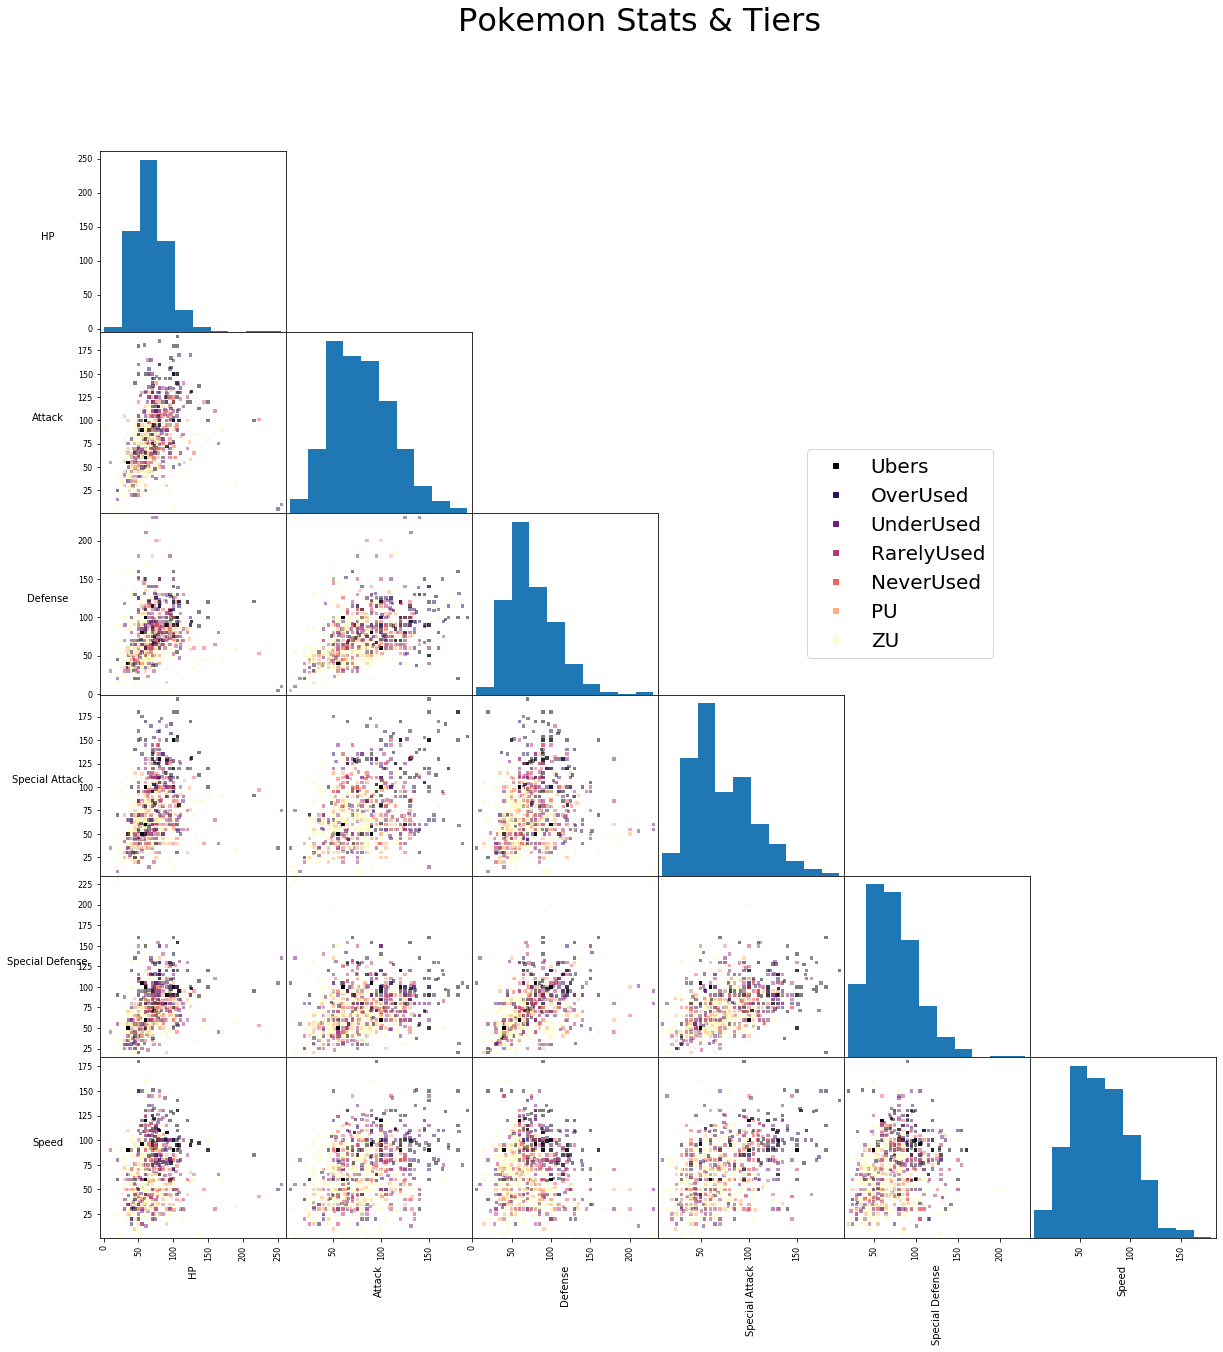

In [24]:
# # n = 6
# # for x in range(n):
# #   for y in range(n):
# #     ax=axes[x, y]
# #     if x != y:
# #         ax.plot(stats_noid.iloc[:,x], stats_noid.iloc[:,y], '.')
# #     ax.xaxis.label.set_rotation(90)
# #     ax.yaxis.label.set_rotation(0)
# #     ax.yaxis.labelpad = 30

# fig, axes = plt.subplots(6, 6, figsize = (20,20))

# for x in range(6):
#     for y in range(x):
#         ax = axes[x,y]
#         if x != y:
#             ax.scatter(stats_noid.iloc[:,x],stats_noid.iloc[:,y])
#         print(x,y)

##############

# iris = datasets.load_iris()
# iris_data = pd.DataFrame(data=iris['data'],columns=iris['feature_names'])
# iris_data["target"] = iris['target']

# color_wheel = {1: "#0392cf", 
#                2: "#7bc043", 
#                3: "#ee4035"}
# colors = iris_data["target"].map(lambda x: color_wheel.get(x + 1))
# ax = scatter_matrix(iris_data, color=colors, alpha=0.6, figsize=(15, 15), diagonal='hist')

#################

axes = pd.plotting.scatter_matrix(stats_noid.iloc[:,:7], c = stats_noid['Tier'],
    cmap = 'magma', figsize = (20,20), alpha = 0.5, marker='s', s = 12)

for x in range(6):
  for y in range(6):
    ax=axes[x, y]
    if x < y:
        ax.set_visible(False)
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.labelpad = 30

handles = [plt.plot([],[],color=plt.cm.magma(i/6.), ls="", marker="s", \
                    markersize=5)[0] for i in range(7)]
labels=["Ubers", "OverUsed", "UnderUsed", "RarelyUsed", "NeverUsed", "PU", "ZU"]
plt.legend(handles, labels, loc=(-1.2,3.2), fontsize = 20)
plt.suptitle("Pokemon Stats & Tiers", fontsize = 32)
plt.show()